# part2 - Chapter6 머신러닝 지도학습 AI 모델링

## 6-1 사이킷런(Sklearn) 라이브러리 

In [1]:
import sklearn.model_selection 
help(sklearn.model_selection) 

from sklearn.model_selection import train_test_split 
help(train_test_split) 

Help on package sklearn.model_selection in sklearn:

NAME
    sklearn.model_selection - Tools for model selection, such as cross validation and hyper-parameter tuning.

PACKAGE CONTENTS
    _classification_threshold
    _plot
    _search
    _search_successive_halving
    _split
    _validation
    tests (package)

CLASSES
    builtins.object
        sklearn.model_selection._search.ParameterGrid
        sklearn.model_selection._search.ParameterSampler
    sklearn.model_selection._classification_threshold.BaseThresholdClassifier(sklearn.base.ClassifierMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
        sklearn.model_selection._classification_threshold.FixedThresholdClassifier
        sklearn.model_selection._classification_threshold.TunedThresholdClassifierCV
    sklearn.model_selection._plot._BaseCurveDisplay(builtins.object)
        sklearn.model_selection._plot.LearningCurveDisplay
        sklearn.model_selection._plot.ValidationCurveDisplay
    sklearn.model_

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

import pandas as pd 
data = {'Feature': [1, 2, 3, 4, 5], 'Target': [3, 6, 9, 12, 15]} 
df = pd.DataFrame(data) 

X = df[['Feature']]
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42 
)

model = LinearRegression()
model.fit(X_train, y_train) 

predictions = model.predict(X_test) 

mse = mean_squared_error(y_test, predictions) 
print("Mean Squared Error", mse)

Mean Squared Error 0.0


In [5]:
from sklearn.model_selection import train_test_split 

X = [[1], [2], [3], [4], [5]]
y = [1, 2, 3, 4, 5] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42
)

print("학습용 데이터", X_train)
print("테스트용 데이터", X_test) 

학습용 데이터 [[5], [3], [1], [4]]
테스트용 데이터 [[2]]


In [10]:
from sklearn.linear_model import LinearRegression 

X_train = [[1], [2], [3], [4]] 
y_train = [2, 4, 6, 8]

model = LinearRegression()

model.fit(X_train, y_train) 

prediction = model.predict([[5], [6]])
print("예측", prediction) 

예측 [10. 12.]


In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

# 1. 데이터 로드 
data = pd.read_csv('datasets/winequality-white.csv', sep=',')

# 2. 입력(X), 출력(y) 분리
X = data.drop(['quality', 'alcohol'], axis=1)
y = data['quality']


# 3. 데이터를 학습용과 테스트용으로 나누기 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42
)

# 4. 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 테스트 데이터로 예측 수행 
y_pred = model.predict(X_test) 

# 6. 모델 평가 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2) 

Mean Squared Error:  0.7137778530412319
R2 Score:  0.07836977206253393


In [32]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=42)

Mean Squared Error:  0.7137778530412319
Root Mean Squared Error (RMSE):  0.8448537465391461
R2 Score 0.07836977206253393


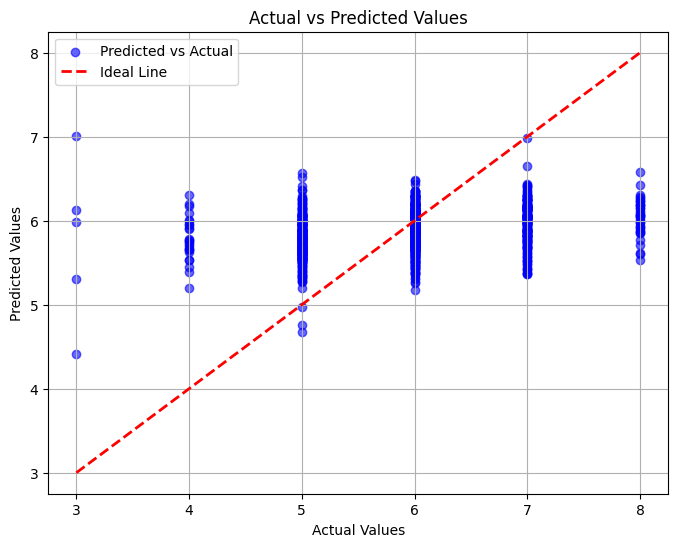

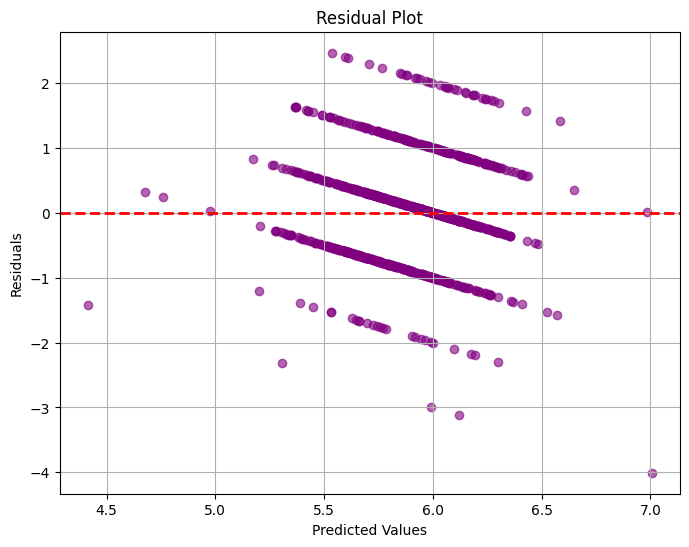

In [41]:
#import numpy as np

mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error: ", mse) 
print("Root Mean Squared Error (RMSE): ", rmse)
print("R2 Score", r2)

import matplotlib.pyplot as plt 

# 실제 값 vs 예측 값 비교 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values") 
plt.title("Actual vs Predicted Values") 
plt.legend()
plt.grid()
plt.show()

# 잔차(Residual) 시각화 
residuals = y_test - y_pred 
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple') 
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values") 
plt.ylabel("Residuals")
plt.title("Residual Plot") 
plt.grid()
plt.show()


## 6-3 로지스틱 회귀

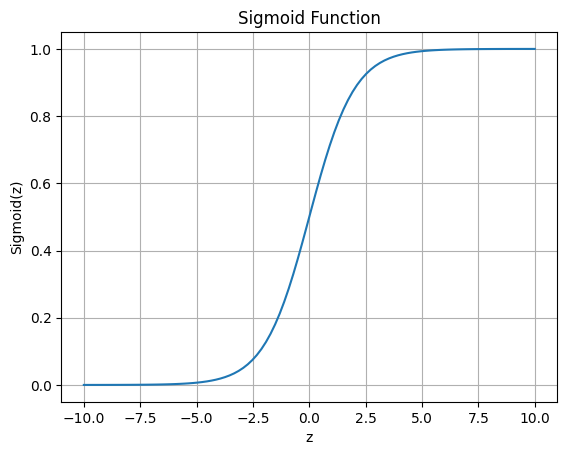

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

def sigmoid(z): 
    return 1 / (1+np.exp(-z))

z = np.linspace(-10, 10, 100) 
sigmoid_value = sigmoid(z) 

plt.plot(z, sigmoid_value) 
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix 

data = pd.read_csv('datasets/heart.csv')

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,
    random_state=42 
)

model = LogisticRegression(max_iter=2000) 
model.fit(X_train, y_train) 

y_pred = model.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred) 

print("Accuracy: ", accuracy) 
print("Confusion Matrix: \n", conf_matrix) 

Accuracy:  0.8852459016393442
Confusion Matrix: 
 [[25  4]
 [ 3 29]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



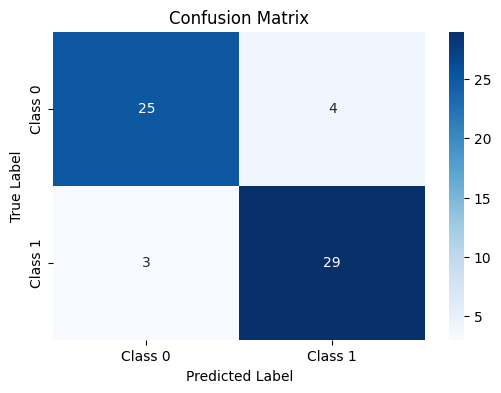

In [11]:
from sklearn.metrics import classification_report 

print("Classification Report: \n", classification_report(y_test, y_pred))

import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Blues", 
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 6-4 의사결정 나무 

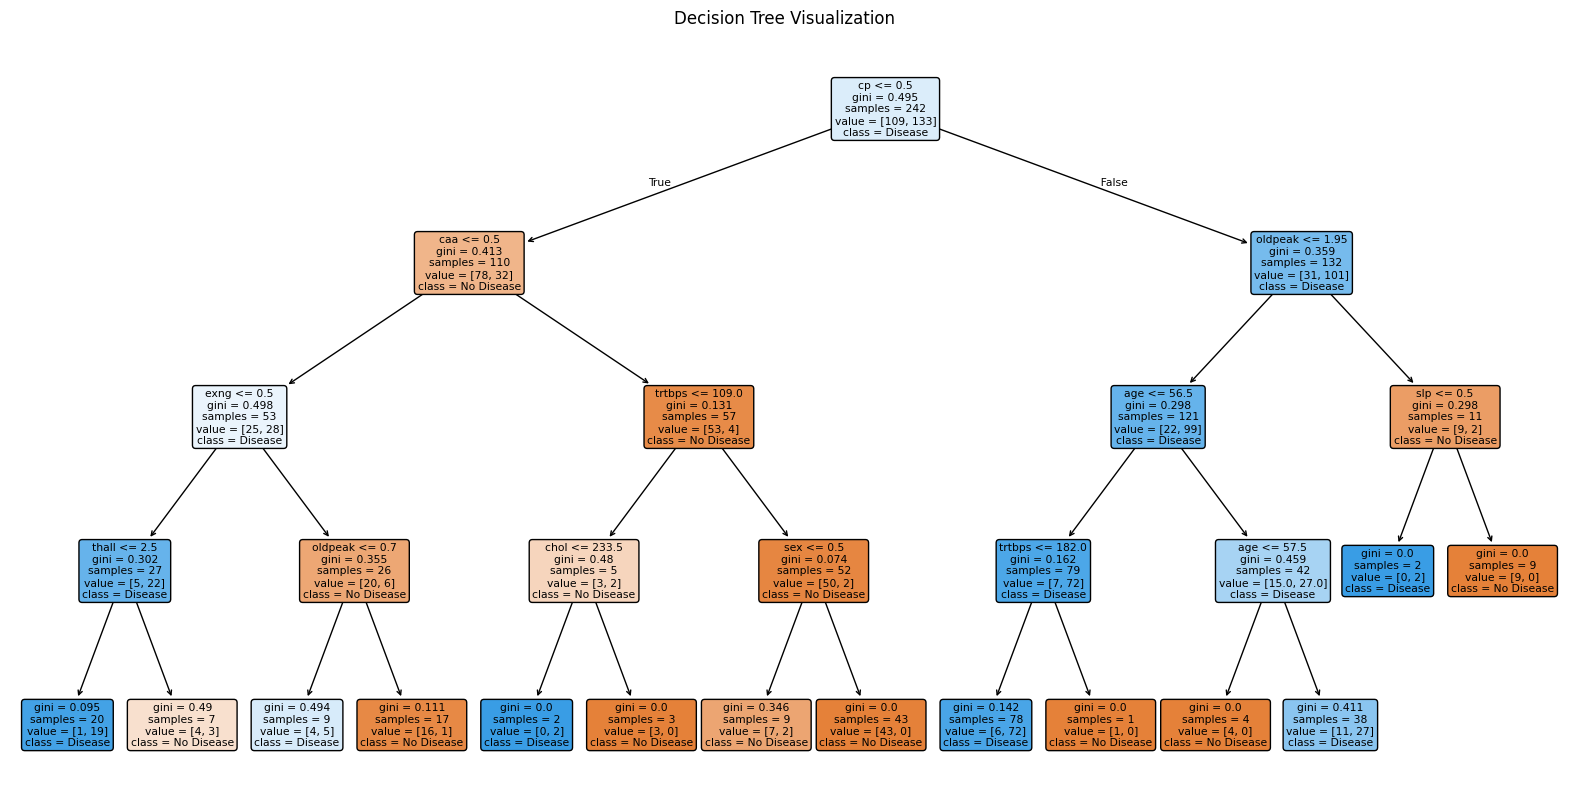

Accuracy:  0.8524590163934426
Confusion Matrix: 
 [[26  3]
 [ 6 26]]
Report               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [17]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # 검증 방법

import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree 

# 1. 데이터 로드 
data = pd.read_csv('datasets/heart.csv')

# 2. 입력과 출력 분리 
X = data.drop(['output'], axis =1 )
y = data['output']

# 3. 데이터를 학습용과 테스트용으로 나누기 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42    
)

# 4. 모델 생성 및 학습 
model = DecisionTreeClassifier(max_depth=4, random_state=42)  #트리 깊이 제한 
model.fit(X_train, y_train) 

# 5. 테스트 데이터로 예측 수행 
y_pred = model.predict(X_test)

# 6. 모델 평가 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=["No Disease", "Disease"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


# 화면 출력 
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Report", report)

## 6-5 앙상블(Emsemble) 모델 